In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 생성
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 2 * x + 3 + 0.1 * torch.randn(x.size())

x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
# 1 층(1 Layers) 신경망 모델
# model = nn.Linear(1,1)
# model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
# 2. 다층 층(2 Layers) 신경망(MLP) 모델 정의
# model = nn.Sequential(
#     nn.Linear(1, 10),  # 입력층 → 은닉층
#     nn.ReLU(),         # 활성화 함수
#     nn.Linear(10, 1)   # 은닉층 → 출력층
# )

- 다중층 구조(Multi-Layer)
    - 첫 번째 은닉층: 16 units + ReLU
    - 두 번째 은닉층: 8 units + ReLU
    - 출력층: 1 unit (회귀 문제)

- 문제 자체는 비선형성을 요구하지 않는 단순한 직선입니다. 결과적으로 ReLU가 직선 관계를 왜곡하거나, 학습을 느리게 만들 수 있습니다.
- 단순한 데이터에 복잡한 모델을 사용하면 불필요한 과적합(overfitting) 이 발생할 수 있습니다.

In [6]:
# 3. 3층(3 Layers) MLP 모델 정의: 1 → 16 → 8 → 1
model = nn.Sequential(
    nn.Linear(1, 16),  # 입력층 → 은닉층1
    nn.ReLU(),
    nn.Linear(16, 8),  # 은닉층1 → 은닉층2
    nn.ReLU(),
    nn.Linear(8, 1)    # 은닉층2 → 출력층
)

In [7]:
# 3. 손실 함수 및 옵티마이저
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
# 4. 학습 루프
for epoch in range(100):
    model.train()
    output = model(x)
    loss = criterion(output, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 9.3723
Epoch 10, Loss: 0.3930
Epoch 20, Loss: 0.0568
Epoch 30, Loss: 0.0340
Epoch 40, Loss: 0.0261
Epoch 50, Loss: 0.0215
Epoch 60, Loss: 0.0184
Epoch 70, Loss: 0.0163
Epoch 80, Loss: 0.0149
Epoch 90, Loss: 0.0137


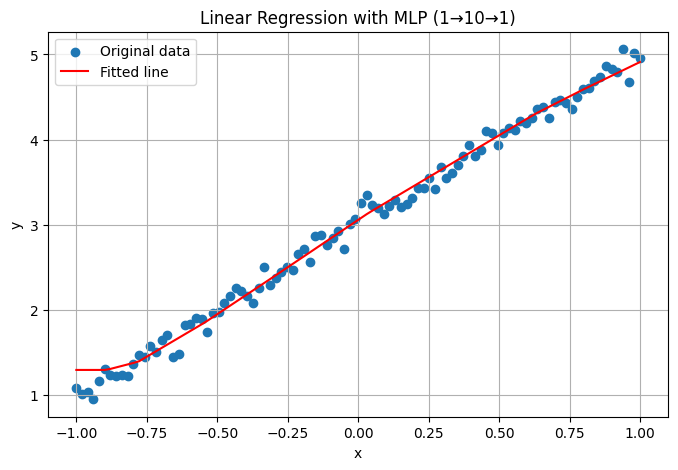

In [9]:
# 5. 예측 결과 시각화
model.eval()
predicted = model(x).detach().numpy()

plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), predicted, color='red', label='Fitted line')
plt.title("Linear Regression with MLP (1→10→1)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()